In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

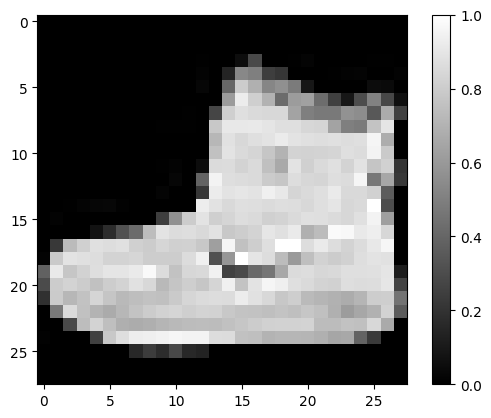

In [20]:
#구글이 호스팅해주는 데이터셋 중 하나 load
#(입력(features),정답(labels)) 
(trainX, trainY),(testX, testY)=tf.keras.datasets.fashion_mnist.load_data()

#데이터 전처리 
#이미지는 0~255인데 0~1로 결과값을 바꿈 /255.0
#reshape:행변환

trainX=trainX / 255.0
testX= testX / 255.0

trainX=trainX.reshape((trainX.shape[0] ,28,28,1))
testX=testX.reshape((testX.shape[0] ,28,28,1))

print(trainX)
#사진 개수 확인
print(trainX.shape)
#l
print(trainY)

#숫자화된 이미지를 보여줌 
plt.imshow(trainX[0])
#이미지를 흑백으로 변경
plt.gray()
#색상 수치화
plt.colorbar()
plt.show()





In [21]:
model = tf.keras.Sequential([  
    #서로다른feature:32 kernel:3*3 padding이미지사이즈를 가로세로 맞추기위해 활성화함수:이미지는 음수가 나오면안되기때문 relu  현재는 흑백인데 color이미지일경우 input_shape에 28,28,3
    tf.keras.layers.Conv2D(32,(3,3), padding="same", activation='relu' , input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), padding="same", activation='relu' , input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3), padding="same", activation='relu' , input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    #relu 음수를 0으로 
    #tf.keras.layers.Dense(128, input_shape=(28,28), activation="relu"),

    #n차원 행렬을 1차원 행렬로 보여주도록(문제점:모델이 응용력이 없어짐)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    #확률 예측을위에 마지막 레이어를 10개 softmax:확률을 0~1로 압축하여 카테고리 예측을 위해 사용
    tf.keras.layers.Dense(10, activation="softmax"),
])

#모델 아웃라인 출력 (input_shape 필수로 넣어야함)
model.summary()

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

#노트북 배터리가없어서 학습속도가 느린 관계로 5번만 학습 validataion_data=() epoch끝날때마다 test를함
#학습 validataion_data=() epoch끝날때마다 test를함  모델평가를 같이하여 overfiting되기전에 학습이 더이상 일어나지않을 때 정지하여 모델을 뽑을 수 있는 장점
model.fit(trainX,trainY,validation_data=(testX, testY), epochs=5)

#모델 평가
#score = model.evaluate(testX, testY)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 32)        